In [1]:
import pandas as pd
import numpy as np
import transformers
import pickle

data = pd.read_csv('stockprice_master_NSE-TATAGLOBAL.csv')


In [2]:
from keras.models import Model, load_model
model: Model = load_model('results/model.keras')

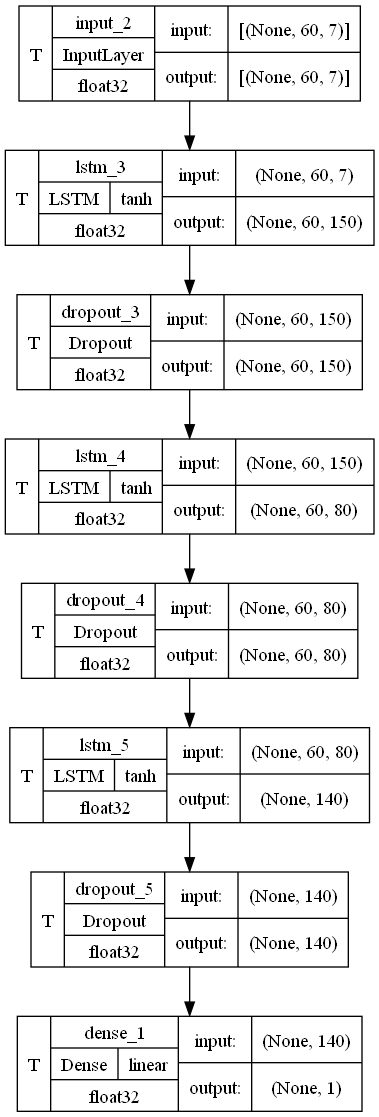

In [3]:
from keras.utils import plot_model

plot_model(model, to_file='results/model.png', 
           show_trainable=True,
           show_shapes=True,
           show_layer_activations=True,
           show_dtype=True)

In [4]:
model.summary()

Model: "stock-price-prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 7)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 150)           94800     
                                                                 
 dropout_3 (Dropout)         (None, 60, 150)           0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 80)            73920     
                                                                 
 dropout_4 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_5 (LSTM)               (None, 140)               123760    
                                                                 
 dropout_5 (Dropout)         (None, 140)    

In [5]:
with open('transformer', 'rb') as filepath:
    transformer: transformers.Transformer = pickle.load(filepath)

In [6]:
transformer.fit(data)

In [7]:
scaler = transformer.get_y_scaler()


In [8]:
test_data = pd.read_csv('mwitiderrick_stockprice_master_tatatest.csv')

In [9]:
seed_data = pd.concat([test_data,data.iloc[0:60,:]]).reset_index(drop=True)

In [10]:
seed_data = transformer.transform(seed_data)

In [11]:
real_values = test_data['Open']

In [12]:
X_test = []
for i in range(60, 76):
    X_test.append(seed_data[i-60:i, :])
X_test = np.array(X_test)

In [13]:
prediction = model.predict(X_test)

1/1 [==============================] - 1s 976ms/step


In [14]:
prediction = scaler.inverse_transform(prediction)

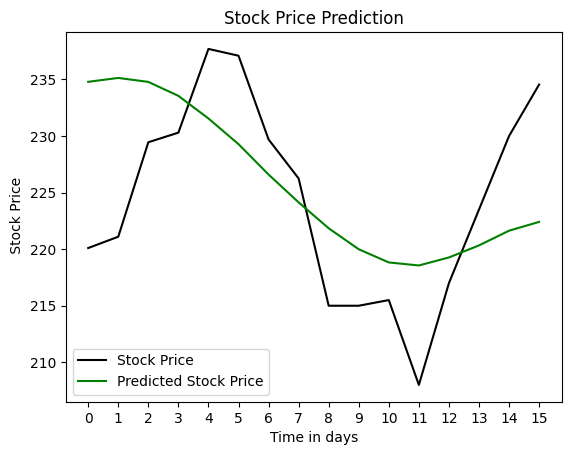

In [17]:
import matplotlib.pyplot as plt

plt.plot(real_values, color='black', label='Stock Price')

plt.plot(prediction, color='green', label='Predicted Stock Price')
plt.xticks(range(16))
plt.title('Stock Price Prediction')
plt.xlabel('Time in days')
plt.ylabel(' Stock Price')
plt.legend()
plt.savefig('results/Stock-price-fig')


In [16]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

results = {'Mean Abs % Err': (mean_absolute_percentage_error(real_values,prediction)*100).round(3),'Root Mean Sq. Err': np.sqrt(mean_squared_error(real_values,prediction)).round(3)}
results

{'Mean Abs % Err': 3.021, 'Root Mean Sq. Err': 7.873}